# Modelització
## Anàlisi de components principals

[<center><img src=./static/Many_features.png width=90%></center>](#img_Many_features)

- Quan tractem amb big data ens podem trobar amb un excés de factors
- Per modelitzar hem de limitar la complexitat del model
- PCA cerca un subespai de factors que maximitza la variabilitat de les dades

## Matriu de covariància
- És una matriu $n \times n$ amb la covariància de cada parell de variables
- La diagonal conté les variàncies de cada variable
- En ser una matriu simètrica (hermítica) és diagonalitzable i podem aplicar el teorema espectral

## Taula de dades
- A partir d'una taula de dades amb $n$ factors i $m$ entrades podem construir una matriu de covariància


- Sigui $\bf x$ un vector representant n factors $\{x_j |\, j = 1, \dots , n\}$
- Siguen $\{{\bf x^{\alpha}} |\, \alpha = 1, \dots , m \}$ les mostres adquirides en el procés de mesura
- La taula de dades és $X_{j, \alpha} = x^\alpha_j$
- El primer moment és $${\bf \mu} \equiv \frac{1}{m}\sum^m_{\alpha = 1}{\bf x^\alpha}$$
- La matriu de covariància és $$C \equiv \frac{1}{m}\sum^m_{\alpha = 1}{\bf (x^\alpha - \mu)(x^\alpha - \mu)^T}$$
- Sigui ${\bf A}_{j, \alpha} = x^\alpha_j - \mu_j$: $$C \equiv \frac{1}{m}{\bf A A^T} $$

## Anàlisi de components principals (PCA)
- Volem trobar els factors que maximitzen la variància
- Valorar quants components principals necessitem

 Volem trobar els valors propis i la rotació que maximitza la variància del núvol de punts en els eixos principals

- Per trobar el PCA podem fer una descomposició de valors singulars $\Gamma$
- Sigui ${\bf A} = {\bf U \Gamma V^T}$ i $\bf V V^T = I$

$$C \equiv \frac{1}{m}{\bf A A^T} = \frac{1}{m}{\bf U \Gamma^2 U^T}$$

- Si $n < m$ les primeres $n$ columnes de $\bf U$ seran els vectors propis  de $\bf C$
- En aquest cas podem ordenar i representar gràficament els valors singulars i decidir quants components farem servir.
- La matriu pot ser mal condicionada si les variàncies estan per sota de la resolució numèrica

- Si tenim poques dades $n \ge m$ 
- les primeres $m$ columnes de $\bf U$ seran els vectors propis  de $\bf C$ i podem escriure:

$${\bf Y} \equiv {\bf \bar{U}^T A} = {\bf \bar{U}^T U \Gamma V^T} = {\bf \Gamma V^T}$$

- Reduint les components a $m$

## Exemple 
### El mercat d'habitatge a Ames

[Holbrook 2021](#bib_Holbrook)

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

- Ames és un dataset que podeu trobar a kaggle.com per fer diferents exercicis.
- Descriu la venda d'habitatges a Ames (Iowa), entre 2006 i 2010.
- Es va crear per tasques didàctiques i conté  2930 observacions de gran nombre de variables 
    - 23 nominals, 23 ordinals, 14 discretes i 20 contínues

In [291]:
df = pd.read_csv("../data/ames.csv")
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

- Comencem triant només variables numerals
- Construïm la matriu de dades centrades $\bf A$

In [292]:
X = df.select_dtypes(['number']).dropna().copy()
m = len(X)
A = (X - X.mean(axis=0)) / m

- Calculant la matriu de covariància podem observar variables amb variàncies molt dispars

In [293]:
C = A.T @ A / m
C.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,0.140763,0.000307,-0.000108,-0.110716,-0.000027,1.567633e-06,-0.000216,-0.000195,-0.004658,-0.002155,...,-0.001022,-0.000042,0.000204,-6.656597e-04,0.000294,0.000646,0.002540,-5.124192e-07,5.987701e-06,-1.308401
MSSubClass,0.000307,0.001387,-0.000312,-0.053484,0.000001,-3.117086e-06,0.000027,0.000005,0.000253,-0.001095,...,-0.000073,0.000009,-0.000036,-3.929397e-05,-0.000042,0.000004,-0.000224,-2.425465e-06,-5.519279e-07,-0.242665
LotFrontage,-0.000108,-0.000312,0.000468,0.066060,0.000006,-9.544902e-07,0.000066,0.000035,0.000695,0.002181,...,0.000193,0.000201,0.000017,4.004615e-05,0.000040,0.000164,0.000005,9.756928e-07,3.417308e-07,0.551298
LotArea,-0.110716,-0.053484,0.066060,52.542141,0.001495,-2.371497e-04,0.005846,0.003649,0.129970,0.697618,...,0.105214,0.041272,-0.009360,2.409260e-03,0.027092,0.028375,0.013703,1.563253e-04,-5.957218e-05,160.914325
OverallQual,-0.000027,0.000001,0.000006,0.001495,0.000002,-1.913426e-07,0.000020,0.000013,0.000088,0.000128,...,0.000038,0.000024,-0.000010,5.664724e-07,0.000004,0.000004,-0.000011,2.357571e-07,-1.304819e-08,0.072703


- És més convenient normalitzar les dades per la desviació estàndard

In [294]:
A = (X - X.mean(axis=0)) / X.std(axis=0)
C = A.T @ A / m

- Podem obtenir els valor singulars de la matriu manualment
- Trobar els vectors propis de la rotació

In [295]:
l, U = np.linalg.eig(C)
gamma2 = np.diagonal(np.linalg.inv(U) @ (m*C) @ U)
gamma2

array([ 9.20659637e+03,  3.53832152e+03,  3.03095027e+03,  2.28808910e+03,
        1.71970713e+03,  1.14163497e+02,  1.32426683e+02,  1.57486579e+02,
        1.69336511e+02,  1.96442561e+02,  2.30356428e+02,  2.83799531e+02,
        3.04110647e+02,  3.60674098e+02,  4.43256894e+02,  4.30043077e+02,
        1.40940714e+03,  1.36984937e+03,  5.27854100e+02,  1.27796158e+03,
        1.27165216e+03,  1.23872579e+03,  1.20897225e+03,  1.16046543e+03,
        1.14947920e+03,  5.92743532e+02,  1.03555582e+03,  1.02531618e+03,
        9.99036120e+02,  6.74934192e+02,  9.44168065e+02,  7.22852851e+02,
        7.67659807e+02,  8.86074372e+02,  8.36207511e+02,  8.55323640e+02,
       -2.56002691e-13,  7.17770016e-13])

- Podem veure que $\bf \Gamma^2$ està mal condicionada
- Per obtenir els valors singulars eliminarem els dos darrer valor per fer l'arrel
- Normalitzant els valors propis obtindrem el percentatge de variància (PoV) de cada component

[95.95101027 59.48379204 55.05406682 47.83397435 41.46935171 37.5420716
 37.01147614 35.74858854 35.66023222 35.19553656 34.77027823 34.06560474
 33.90397022 32.18005311 32.02055866 31.60753265 30.72731789 29.76700139
 29.24591664 28.91725282 27.70667441 26.88592292 25.9794956  24.34632482
 22.97507562 21.05366699 20.73748002 18.99142168 17.43876849 16.84635068
 15.17749743 14.01579685 13.01293629 12.5493657  11.5076793  10.68473194]


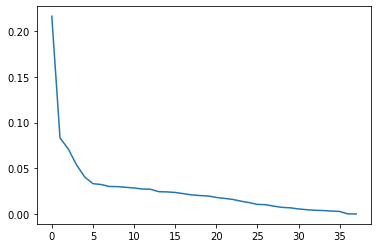

In [296]:
gamma = np.sqrt(gamma2[:-2])
print(np.sort(gamma)[::-1])
norm = np.sum(l)
plt.plot(np.sort(l)[::-1] / norm)

- El mateix ho podem fer amb scikit introduint directament les dades centrades

[9.59510103e+01 5.94837920e+01 5.50540668e+01 4.78339744e+01
 4.14693517e+01 3.75420716e+01 3.70114761e+01 3.57485885e+01
 3.56602322e+01 3.51955366e+01 3.47702782e+01 3.40656047e+01
 3.39039702e+01 3.21800531e+01 3.20205587e+01 3.16075327e+01
 3.07273179e+01 2.97670014e+01 2.92459166e+01 2.89172528e+01
 2.77066744e+01 2.68859229e+01 2.59794956e+01 2.43463248e+01
 2.29750756e+01 2.10536670e+01 2.07374800e+01 1.89914217e+01
 1.74387685e+01 1.68463507e+01 1.51774974e+01 1.40157968e+01
 1.30129363e+01 1.25493657e+01 1.15076793e+01 1.06847319e+01
 4.26108083e-14 6.10485938e-15]


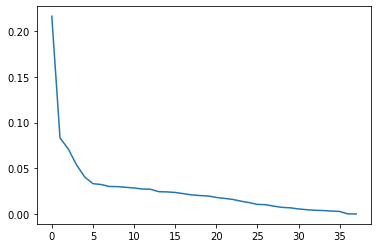

In [297]:
pca = PCA()
A_pca = pca.fit_transform(A)
print(pca.singular_values_)
plt.plot(pca.explained_variance_ratio_)

- Podem representar les dades en funció de les components principals

In [298]:
component_names = [f"PC{i+1}" for i in range(A_pca.shape[1])]
A_pca = pd.DataFrame(A_pca, columns=component_names)
A_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
0,1.319731,0.460809,-1.281159,-2.148942,0.346890,-0.601457,-1.211502,-0.895835,-0.527543,-0.650879,...,0.139580,-0.104417,0.172636,-0.237479,-0.461278,-0.245835,-0.087474,0.077977,1.140644e-14,-5.882233e-16
1,-0.257477,-1.002063,1.212648,0.054882,-1.603195,-2.665921,1.383727,2.961815,-0.901601,1.239452,...,-0.810160,-1.079134,0.160015,-0.388965,-0.050488,-0.523719,0.183410,0.002743,2.001131e-14,-9.825173e-17
2,1.563844,0.349138,-1.134329,-1.554725,-0.263598,-0.608339,0.310285,-0.958591,0.178902,-0.549020,...,0.230559,-0.792103,0.335500,0.204970,-0.099878,0.627959,-0.040716,-0.010966,6.172921e-15,2.230990e-15
3,-0.591799,1.102228,0.720629,0.013560,0.921279,-0.745528,-0.823362,-2.302580,-1.965097,1.350839,...,0.043222,0.835301,0.758032,0.207866,-0.553493,-0.079595,1.339580,0.697179,-1.034185e-15,6.184501e-16
4,4.368248,1.401823,-0.354410,-1.294764,0.142606,-1.208472,0.781910,-0.285644,0.836919,-0.404440,...,0.168737,0.060059,-0.060488,0.175750,-0.509391,-0.179464,-0.050883,-0.127301,-1.980440e-15,1.440352e-15


- I veure la seva composició

In [299]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=A.columns,
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
Id,-0.011307,0.018298,0.009619,-0.012039,0.084735,0.308716,-0.140325,0.135343,0.306803,0.140013,...,-0.022691,0.004167,-0.009188,0.033649,-0.005944,0.012082,-0.014294,-0.008531,1.001741e-16,-0.000000e+00
MSSubClass,-0.019118,0.177757,-0.210979,-0.328512,0.249552,0.163405,0.144024,0.059874,-0.247494,0.088560,...,0.025760,0.145729,-0.101108,-0.072858,0.119909,-0.027203,-0.075539,0.031236,5.761635e-17,1.219657e-17
LotFrontage,0.155740,0.000166,0.288545,0.187242,-0.003007,-0.160580,-0.131319,-0.089405,0.197585,-0.030284,...,-0.003105,-0.029249,0.009261,-0.001355,0.050662,-0.034643,0.005789,0.077730,5.123729e-17,2.653378e-16
LotArea,0.115377,-0.011128,0.285973,0.053399,-0.017216,-0.139527,-0.095455,-0.087529,0.237081,-0.103077,...,-0.046675,0.043449,-0.021645,-0.002588,-0.048216,-0.016845,0.007443,-0.019610,1.493128e-16,-6.161955e-17
OverallQual,0.288091,-0.017955,-0.093024,-0.015544,-0.142597,0.007924,0.018064,-0.026411,-0.138855,0.027744,...,-0.560660,0.197094,-0.149492,0.171325,-0.518680,0.085696,0.079192,0.060716,-2.085868e-16,2.146063e-16


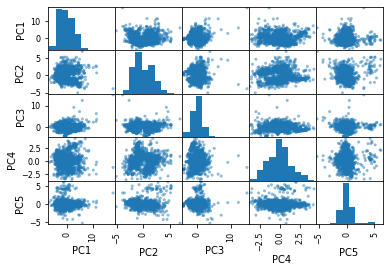

In [300]:
plt = pd.plotting.scatter_matrix(A_pca[A_pca.columns[:5]])

# Referències

- Elsborg Madsen, R. et.al. **2004**. *Singular Value Decomposition and Principal Component Analysis*.
- <a id='bib_Holbrook'></a> Holbrook, R. **2021**. *Exercise: Principal Component Analysis*. kaggle.com
- <a id='img_Many_features'></a> El.Sherbini, M.M. **2020**. *Jane_street_Extensive_EDA & PCA starter*. kaggle.com
- De Cock, D. **2011**. *Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project*. Journal of Statistics Education Volume 19, Number 3(2011),

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg